Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK. https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.

In [32]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('stopwords')

nltk.corpus.gutenberg.fileids()
paradise = gutenberg.words('milton-paradise.txt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yewandetaiwo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(paradise[:100])

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I', 'Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if']


In [8]:
sw = set(nltk.corpus.stopwords.words('english'))

In [9]:
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")#[:10]
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [21]:
flat_list = [item for sublist in text_sentences for item in sublist]

#put words in lowercase
lower_text = [w.lower() for w in flat_list]
new_list = [word for word in lower_text if word.isalnum()]
filt_list = [word for word in new_list if word not in sw]
print(filt_list[:10000])

['paradise', 'lost', 'john', 'milton', '1667', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'man', 'restore', 'us', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flowed', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'aonian', 'mount', 'pursues', 'things', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'wings', 'outspread', 'dove', 'like', 'sat', 'st', 'brooding', 'vast', 'abyss', 'mad', 'st', 'pregna

In [22]:
nltk.download('wordnet')
#lemmatize
wl = WordNetLemmatizer()
lem_list = [wl.lemmatize(word) for word in filt_list]
print(lem_list[:10000])

['paradise', 'lost', 'john', 'milton', '1667', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'man', 'restore', 'u', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heaven', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flowed', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'aonian', 'mount', 'pursues', 'thing', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'dost', 'prefer', 'temple', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'wing', 'outspread', 'dove', 'like', 'sat', 'st', 'brooding', 'vast', 'abyss', 'mad', 'st', 'pregnant', 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yewandetaiwo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
#Import FreqDist
from nltk.probability import FreqDist

paradise_freq = FreqDist(lem_list)
paradise_freq.most_common(20)

#drop more words that are like old english stop words
ignore_words=['thou','thy','thee','thus','u', 'yet', 'shall', 'though', 'may', 'hath', 'till', 'like', 'whose']
paradise_list = [word for word in lem_list if word not in ignore_words]

In [50]:
paradise_freq = FreqDist(paradise_list)
paradise_freq = dict(paradise_freq.most_common(20))
paradise_freq

{'heaven': 436,
 'god': 316,
 'earth': 217,
 'man': 176,
 'first': 175,
 'day': 157,
 'high': 153,
 'one': 142,
 'son': 132,
 'far': 129,
 'death': 127,
 'power': 125,
 'great': 123,
 'world': 119,
 'hell': 119,
 'thing': 116,
 'light': 116,
 'angel': 111,
 'stood': 110,
 'night': 109}

In [53]:
x = paradise_freq.keys()
y = paradise_freq.values()

dict_values([436, 316, 217, 176, 175, 157, 153, 142, 132, 129, 127, 125, 123, 119, 119, 116, 116, 111, 110, 109])

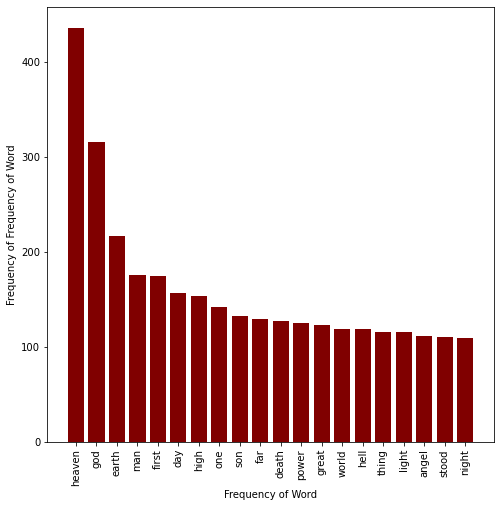

In [56]:
plt.figure(figsize=(8,8))
plt.bar(x,y,color='maroon')
plt.xlabel('Frequency of Word')
plt.ylabel('Frequency of Frequency of Word')
plt.xticks(rotation=90)
plt.show()

4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

new_sent = []
#scores = []
for sentence in text_sentences:
    filt_sentence = [word for word in sentence if word.isalnum()]
    new_sent.append(filt_sentence)
#     for i in filt_sentence:
#         sent_score = sia.polarity_scores(filt_sentence[0])
#         scores.append(sent_score)


scores = [sia.polarity_scores(filt_sentence[0]) for filt_sentence in new_sent]
scores
# paradise_df=pd.DataFrame({'Text': [new_sent],
#                          'Scores': [scores]})

# paradise_df.head()
#scores = pd.DataFrame(scores)

# paradise_df = pd.DataFrame(filt_sentence)
# paradise_df

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou